In [1]:
import numpy as np
import pandas as pd
import os
import mne
import matplotlib.pyplot as plt
%matplotlib qt

# RANDOMISER

In [ ]:
# DONE: Create a randomised list of tasks for controls and patients (EEG sessions)
rng = np.random.default_rng(42)  # reproducible

n = 25
tasks = np.array(["ARI"] * 12 + ["De-CRAT"] * 13)
rng.shuffle(tasks)

# -----------------------
# Controls
# -----------------------
controls = [f"PDc_sub{i:02d}" for i in range(1, n+1)]
controls_first_task = tasks.copy()

df_controls = pd.DataFrame({
    "controls": controls,
    "cont_first_task": controls_first_task
})

# -----------------------
# Patients EEG sessions
# -----------------------
patients_eeg = [f"PDp_sub{i:02d}" for i in range(1, n+1)]
patients_eeg_first_task = tasks.copy()
rng.shuffle(patients_eeg_first_task)

df_eeg = pd.DataFrame({
    "patients_eeg": patients_eeg,
    "s1_ON_first_task": patients_eeg_first_task,
    "s2_OFF_first_task": np.where(
    patients_eeg_first_task == "ARI", "De-CRAT", "ARI"
)
})

# -----------------------
# Patients tACS sessions
# -----------------------
tacs_protocols = []
for _ in range(n):
    p = np.array([1, 2, 3])
    rng.shuffle(p)
    tacs_protocols.append(p)

tacs_protocols = np.vstack(tacs_protocols)

df_tacs = pd.DataFrame({
    "s3_tacs": tacs_protocols[:, 0],
    "s4_tacs": tacs_protocols[:, 1],
    "s5_tacs": tacs_protocols[:, 2],
})

# -----------------------
# Combine into one dataframe
# -----------------------
randomised_df = pd.concat([df_controls, df_eeg, df_tacs], axis=1)

path_to_save = 'C:\\Users\\a1902989\\Box\\BonoKat\\#PhD Adelaide\\# research project\\# PD project\\docs'
randomised_df.to_csv(os.path.join(path_to_save, 'session_randomiser.csv'), index=False)

# BEHAVIOURAL

**ARI**

In [2]:
beh_path = "C:\\Users\\a1902989\\Box\\Katya\\# PD project\\pilot\\beh\\ari"
beh_file_name = "SeleST_0_ari_2026-01-30_10h02.00.463.txt" # "SeleST_1_x_2025-12-10_10h48.12.597.txt"
beh_data = pd.read_csv(os.path.join(beh_path, beh_file_name), sep=" ")

columns_to_drop = ['L2_press', 'R2_press', 'L2_RT', 'R2_RT']
beh_data.drop(columns=columns_to_drop, inplace=True)
beh_data.to_csv(os.path.join(beh_path, f"{beh_file_name[:-4]}.csv"))
beh_data

,block,trial,startTime,trialName,trialType,stopTime,L_targetTime,R_targetTime,Choice,L_press,R_press,L_RT,R_RT
0,-1,1,3.6,Go,1,0,800,800,1,1,1,797.4,858.4
1,-1,2,7.1,Go,1,0,800,800,1,1,1,794.1,821.2
2,0,3,12.2,Go,1,0,800,800,1,1,1,768.0,782.0
3,0,4,15.8,Go,1,0,800,800,1,1,1,770.5,746.7
4,0,5,19.4,Go,1,0,800,800,1,1,1,777.7,768.5
5,0,6,23.1,Go,1,0,800,800,1,1,1,797.1,812.1
6,0,7,26.6,Stop-all,2,450,800,800,1,0,0,NaN,NaN
7,0,8,30.4,Go,1,0,800,800,1,1,1,832.2,880.9
8,0,9,34.2,Stop-all,2,475,800,800,1,1,0,756.0,NaN
9,0,10,37.5,Go,1,0,800,800,1,1,1,767.1,789.1


In [3]:
beh_data["correct"] = np.where(
    ((beh_data["trialName"] == "Go") & (beh_data["L_press"] == 1) & (beh_data["R_press"] == 1)) |
    ((beh_data["trialName"] == "Stop-all") & (beh_data["L_press"] == 0) & (beh_data["R_press"] == 0)),
    1,
    0
)


In [7]:
beh_data[20:]

,block,trial,startTime,trialName,trialType,stopTime,L_targetTime,R_targetTime,Choice,L_press,R_press,L_RT,R_RT,correct
20,0,21,157.5,Go,1,0,800,800,1,1,1,750.4,736.6,1
21,0,22,160.6,Go,1,0,800,800,1,1,1,772.2,779.0,1
22,0,23,163.5,Go,1,0,800,800,1,1,1,835.3,838.0,1
23,0,24,166.5,Go,1,0,800,800,1,1,1,755.1,740.2,1
24,0,25,169.4,Stop-all,2,500,800,800,1,1,1,787.3,788.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,12,432,1611.3,Go,1,0,800,800,1,1,1,794.6,793.7,1
432,12,433,1614.1,Go,1,0,800,800,1,1,1,843.3,849.2,1
433,12,434,1616.9,Go,1,0,800,800,1,1,1,790.8,807.9,1
434,12,435,1620.1,Stop-all,2,575,800,800,1,1,1,871.8,887.8,0


In [5]:
# Giuseppe
perf_all = beh_data['correct'].mean()
perf_go = beh_data[beh_data['trialName'] == 'Go']['correct'].mean()
perf_stop = beh_data[beh_data['trialName'] == 'Stop-all']['correct'].mean()
print(f"Overall performance: {perf_all:.2%}")
print(f"Go trial performance: {perf_go:.2%}")
print(f"Stop trial performance: {perf_stop:.2%}")

Overall performance: 76.83%
Go trial performance: 87.95%
Stop trial performance: 41.35%


In [4]:
# Ryoki
perf_all = beh_data['correct'].mean()
perf_go = beh_data[beh_data['trialName'] == 'Go']['correct'].mean()
perf_stop = beh_data[beh_data['trialName'] == 'Stop-all']['correct'].mean()
print(f"Overall performance: {perf_all:.2%}")
print(f"Go trial performance: {perf_go:.2%}")
print(f"Stop trial performance: {perf_stop:.2%}")

Overall performance: 85.32%
Go trial performance: 98.19%
Stop trial performance: 44.23%


In [8]:
# Emily
perf_all = beh_data['correct'].mean()
perf_go = beh_data[beh_data['trialName'] == 'Go']['correct'].mean()
perf_stop = beh_data[beh_data['trialName'] == 'Stop-all']['correct'].mean()
print(f"Overall performance: {perf_all:.2%}")
print(f"Go trial performance: {perf_go:.2%}")
print(f"Stop trial performance: {perf_stop:.2%}")

Overall performance: 75.92%
Go trial performance: 87.05%
Stop trial performance: 40.38%


In [ ]:
# Amy
perf_all = beh_data['correct'].mean()
perf_go = beh_data[beh_data['trialName'] == 'Go']['correct'].mean()
perf_stop = beh_data[beh_data['trialName'] == 'Stop-all']['correct'].mean()
print(f"Overall performance: {perf_all:.2%}")
print(f"Go trial performance: {perf_go:.2%}")
print(f"Stop trial performance: {perf_stop:.2%}")

Overall performance: 85.32%
Go trial performance: 96.99%
Stop trial performance: 48.08%


In [ ]:
# Katya
perf_all = beh_data['correct'].mean()
perf_go = beh_data[beh_data['trialName'] == 'Go']['correct'].mean()
perf_stop = beh_data[beh_data['trialName'] == 'Stop-all']['correct'].mean()
print(f"Overall performance: {perf_all:.2%}")
print(f"Go trial performance: {perf_go:.2%}")
print(f"Stop trial performance: {perf_stop:.2%}")

Overall performance: 72.71%
Go trial performance: 84.04%
Stop trial performance: 36.54%


In [113]:
# Toshiki
perf_all = beh_data['correct'].mean()
perf_go = beh_data[beh_data['trialName'] == 'Go']['correct'].mean()
perf_stop = beh_data[beh_data['trialName'] == 'Stop-all']['correct'].mean()
print(f"Overall performance: {perf_all:.2%}")
print(f"Go trial performance: {perf_go:.2%}")
print(f"Stop trial performance: {perf_stop:.2%}")

Overall performance: 84.51%
Go trial performance: 97.71%
Stop trial performance: 40.91%


In [6]:
# Katya 500ms
perf_all = beh_data['correct'].mean()
perf_go = beh_data[beh_data['trialName'] == 'Go']['correct'].mean()
perf_stop = beh_data[beh_data['trialName'] == 'Stop-all']['correct'].mean()
print(f"Overall performance: {perf_all:.2%}")
print(f"Go trial performance: {perf_go:.2%}")
print(f"Stop trial performance: {perf_stop:.2%}")

Overall performance: 80.61%
Go trial performance: 92.80%
Stop trial performance: 42.50%


In [10]:
# Katya 500ms + 25ms
perf_all = beh_data['correct'].mean()
perf_go = beh_data[beh_data['trialName'] == 'Go']['correct'].mean()
perf_stop = beh_data[beh_data['trialName'] == 'Stop-all']['correct'].mean()
print(f"Overall performance: {perf_all:.2%}")
print(f"Go trial performance: {perf_go:.2%}")
print(f"Stop trial performance: {perf_stop:.2%}")

Overall performance: 85.15%
Go trial performance: 94.81%
Stop trial performance: 54.17%


Noah's performance
- Overall performance: 80.37%
- Go trial performance: 94.39%
- Stop trial performance: 36.15%

Katya's performance
* 600ms
- Overall performance: 72.71%
- Go trial performance: 84.04%
- Stop trial performance: 36.54%

* 500ms
- Overall performance: 80.61%
- Go trial performance: 92.80%
- Stop trial performance: 42.50%

* 500ms + 25ms
- Overall performance: 85.15%
- Go trial performance: 94.81%
- Stop trial performance: 54.17%

Toshiki's performance
- Overall performance: 84.51%
- Go trial performance: 97.71%
- Stop trial performance: 40.91%

Amy (500ms + 25ms)
- Overall performance: 85.32%
- Go trial performance: 96.99%
- Stop trial performance: 48.08%

Emily (500ms + 25ms)
- Overall performance: 75.92%
- Go trial performance: 87.05%
- Stop trial performance: 40.38%

Ryoki (500ms + 25ms)
- Overall performance: 85.32%
- Go trial performance: 98.19%
- Stop trial performance: 44.23%

Giuseppe  (450ms + 25ms)
- Overall performance: 76.83%
- Go trial performance: 87.95%
- Stop trial performance: 41.35%

Trigger log

In [114]:
trigger_log_path = "C:\\Users\\a1902989\\Box\\Katya\\# PD project\\pilot\\beh\\ari"
trigger_log_file_name = "test_triggers_log.txt" # "SeleST_1_x_2025-12-10_10h48.12.597.txt"
trigger_log_data = pd.read_csv(os.path.join(trigger_log_path, trigger_log_file_name), sep="\t")

# trigger_log_data.to_csv(os.path.join(trigger_log_path, f"{trigger_log_file_name[:-4]}.csv"))
trigger_log_data

,time_s,trial,trialType,trigger
0,68.969972,'nan','nan',19
1,68.985673,1,Go,1
2,69.737748,1,Go,2
3,70.603083,'nan','R_press',4
4,70.603744,'nan','L_press',3
...,...,...,...,...
1428,1018.883559,284,Stop-all,2
1429,1019.542910,'nan','Stop-all',5
1430,1019.692274,'nan','R_press',4
1431,1019.708830,'nan','L_press',3


In [115]:
trigger_log_data['trigger']

0       19
1        1
2        2
3        4
4        3
        ..
1428     2
1429     5
1430     4
1431     3
1432     6
Name: trigger, Length: 1433, dtype: int64

In [116]:
last_col = trigger_log_data['trigger']
unique_vals, counts = np.unique(last_col, return_counts=True)
unique_counts = dict(zip(unique_vals, counts))
unique_counts

counts = pd.Series(trigger_log_data['trigger']).value_counts()
print(counts)

trigger
1     284
2     284
6     284
4     254
3     249
5      66
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
Name: count, dtype: int64


# EEG

**Amp tests**

In [ ]:
eeg_path = "C:\\Users\\a1902989\\Box\\Katya\\# PD project\\pilot\\eeg"
eeg_file_name = "test_nosub_int_acc.vhdr" # test_nosub_TW3.vhdr
raw = mne.io.read_raw_brainvision(os.path.join(eeg_path, eeg_file_name), preload=True)
raw.info

Extracting parameters from C:\Users\a1902989\Box\Katya\# PD project\pilot\eeg\test_nosub_int_acc.vhdr...
Setting channel info structure...
Reading 0 ... 5979  =      0.000 ...    11.958 secs...


C:\Users\a1902989\AppData\Local\Temp\ipykernel_17800\1449683084.py:3: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (131.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(os.path.join(eeg_path, eeg_file_name), preload=True)
C:\Users\a1902989\AppData\Local\Temp\ipykernel_17800\1449683084.py:3: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['x_dir', 'y_dir', 'z_dir']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(os.path.join(eeg_path, eeg_file_name), preload=True)


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 64 EEG, 3 misc
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 131.0 Hz
 meas_date: 2026-01-15 09:52:07 UTC
 nchan: 67
 projs: []
 sfreq: 500.0 Hz
>

**ARI**

In [7]:
eeg_path = "C:\\Users\\a1902989\\Box\\Katya\\# PD project\\pilot\\eeg"
eeg_file_name = "test_AM_07_ARI.vhdr"
raw = mne.io.read_raw_brainvision(os.path.join(eeg_path, eeg_file_name), preload=True)
raw.info

Extracting parameters from C:\Users\a1902989\Box\Katya\# PD project\pilot\eeg\test_AM_07_ARI.vhdr...
Setting channel info structure...
Reading 0 ... 794029  =      0.000 ...  1588.058 secs...


C:\Users\a1902989\AppData\Local\Temp\ipykernel_27504\1969921993.py:3: RuntimeWarning: No coordinate information found for channels ['Photodiode', 'Acc X', 'Acc Y', 'Acc Z', 'EMG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(os.path.join(eeg_path, eeg_file_name), preload=True)
C:\Users\a1902989\AppData\Local\Temp\ipykernel_27504\1969921993.py:3: RuntimeWarning: Not setting positions of 5 misc channels found in montage:
['Photodiode', 'Acc X', 'Acc Y', 'Acc Z', 'EMG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(os.path.join(eeg_path, eeg_file_name), preload=True)


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 64 EEG, 5 misc
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 131.0 Hz
 meas_date: 2026-01-14 15:03:51 UTC
 nchan: 69
 projs: []
 sfreq: 500.0 Hz
>

In [8]:
events = mne.events_from_annotations(raw)
events

Used Annotations descriptions: [np.str_('Stimulus/S  1'), np.str_('Stimulus/S  2'), np.str_('Stimulus/S  3'), np.str_('Stimulus/S  4'), np.str_('Stimulus/S  5'), np.str_('Stimulus/S  6'), np.str_('Stimulus/S 19'), np.str_('Stimulus/S 20'), np.str_('Stimulus/S 21'), np.str_('Stimulus/S 22'), np.str_('Stimulus/S 23'), np.str_('Stimulus/S 24'), np.str_('Stimulus/S 25'), np.str_('Stimulus/S 26'), np.str_('Stimulus/S 27'), np.str_('Stimulus/S 28'), np.str_('Stimulus/S 29'), np.str_('Stimulus/S 30'), np.str_('Stimulus/S 31'), np.str_('Stimulus/S 32')]


(array([[ 54373,      0,     19],
        [ 54378,      0,      1],
        [ 54692,      0,      2],
        ...,
        [786582,      0,      4],
        [786586,      0,      3],
        [786807,      0,      6]], shape=(2123, 3)),
 {np.str_('Stimulus/S  1'): 1,
  np.str_('Stimulus/S  2'): 2,
  np.str_('Stimulus/S  3'): 3,
  np.str_('Stimulus/S  4'): 4,
  np.str_('Stimulus/S  5'): 5,
  np.str_('Stimulus/S  6'): 6,
  np.str_('Stimulus/S 19'): 19,
  np.str_('Stimulus/S 20'): 20,
  np.str_('Stimulus/S 21'): 21,
  np.str_('Stimulus/S 22'): 22,
  np.str_('Stimulus/S 23'): 23,
  np.str_('Stimulus/S 24'): 24,
  np.str_('Stimulus/S 25'): 25,
  np.str_('Stimulus/S 26'): 26,
  np.str_('Stimulus/S 27'): 27,
  np.str_('Stimulus/S 28'): 28,
  np.str_('Stimulus/S 29'): 29,
  np.str_('Stimulus/S 30'): 30,
  np.str_('Stimulus/S 31'): 31,
  np.str_('Stimulus/S 32'): 32})

In [20]:
ann = raw.annotations

counts = pd.Series(ann.description).value_counts()
print(counts)

Stimulus/S  1    33
Stimulus/S  2    33
Stimulus/S  6    33
Stimulus/S  3    27
Stimulus/S  4    21
Stimulus/S  5     8
Stimulus/S 21     1
Stimulus/S 22     1
Name: count, dtype: int64


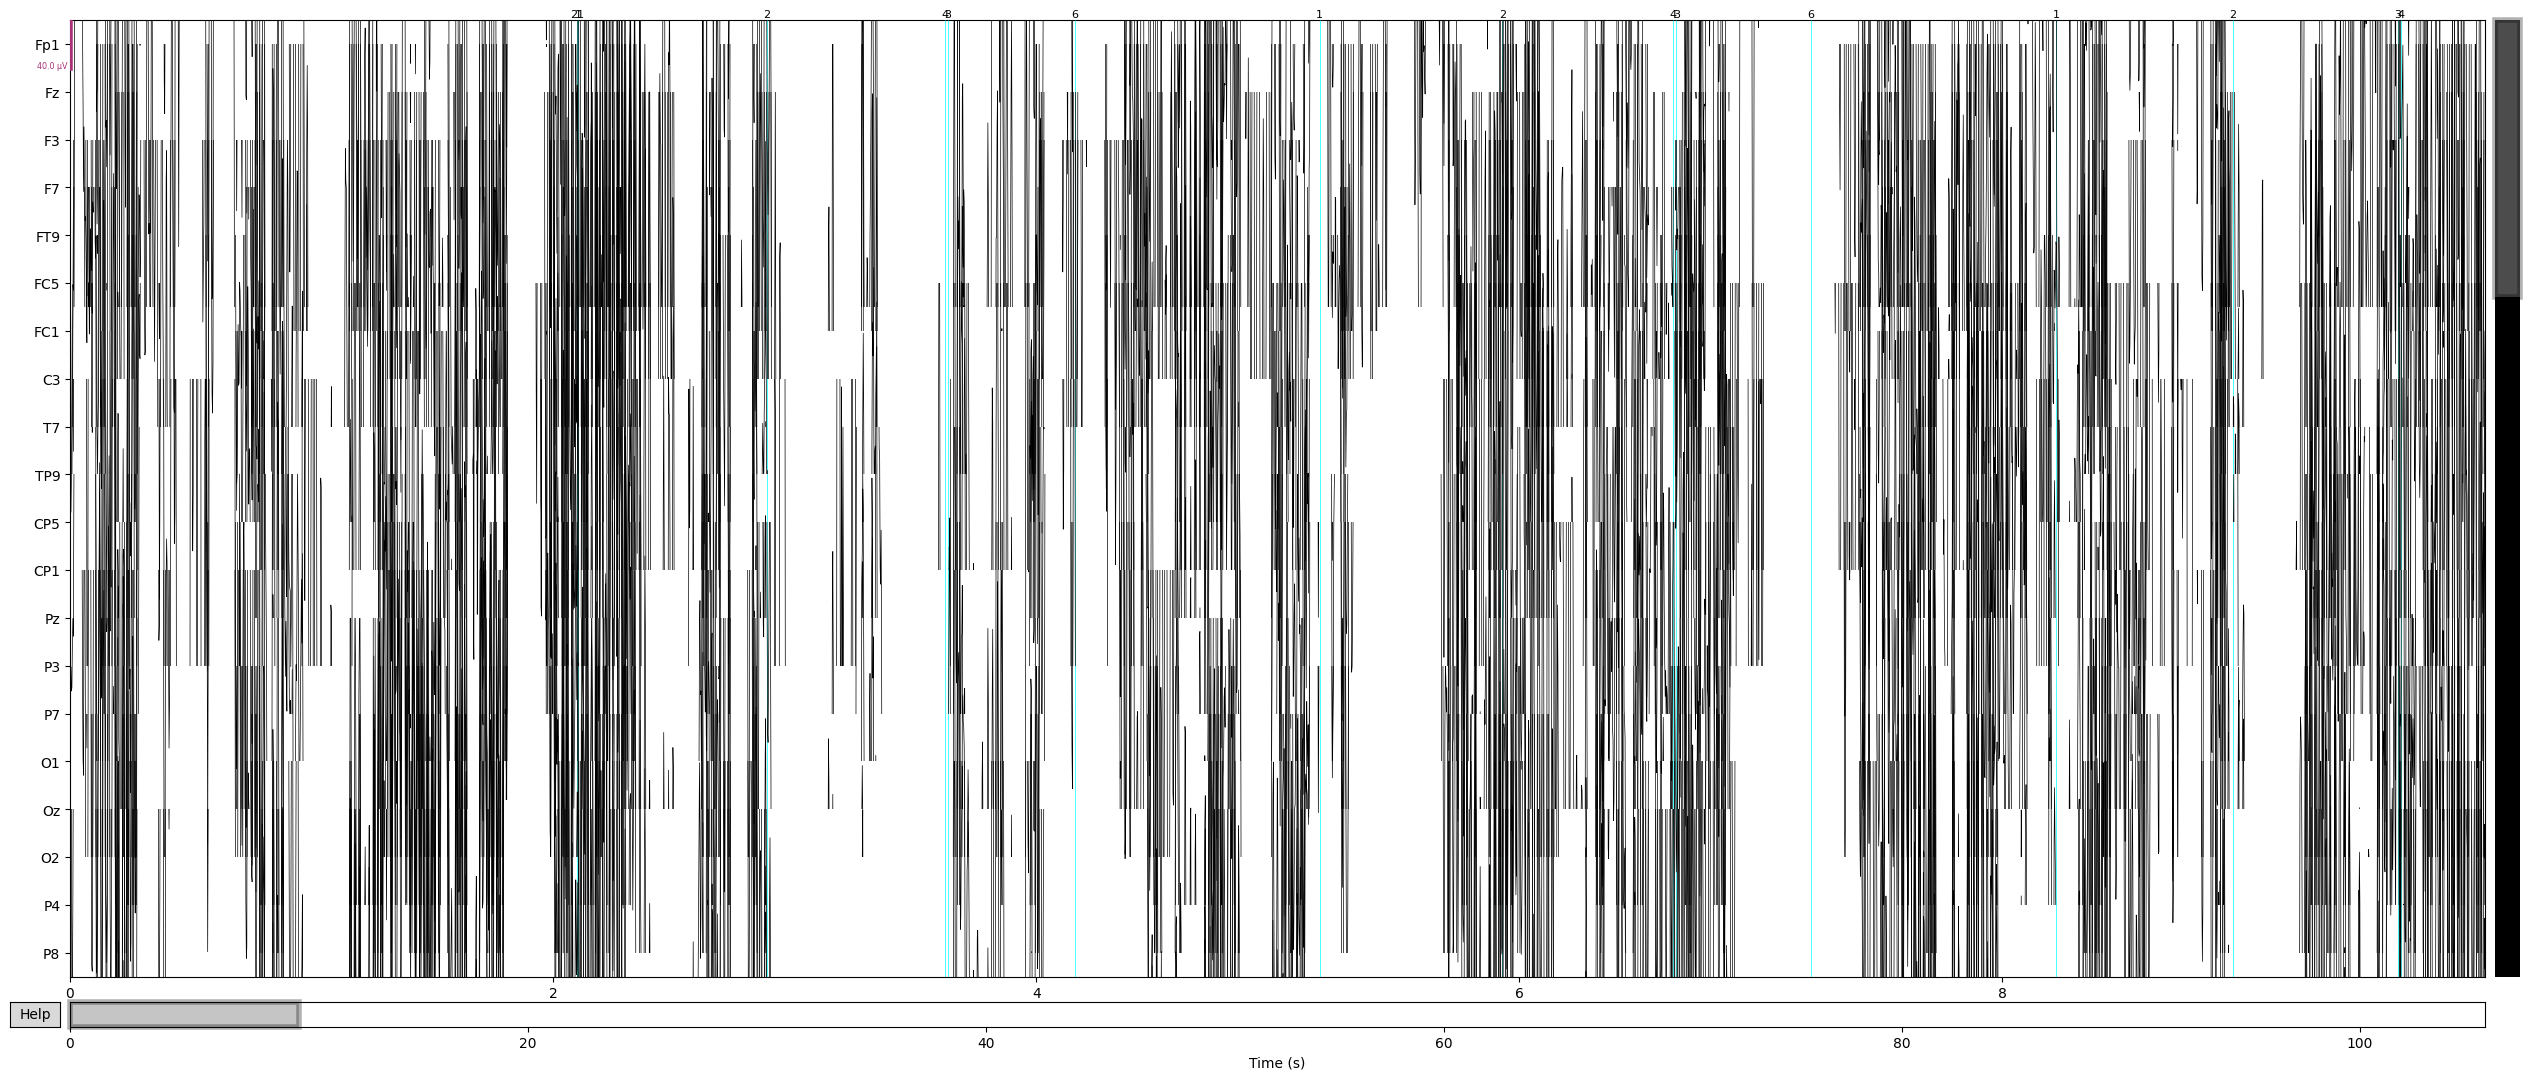

In [21]:
raw.set_annotations(None)
raw.plot(events=events[0])

**De-CRAT**

In [14]:
eeg_path = "C:\\Users\\a1902989\\Box\\Katya\\# PD project\\pilot\\eeg"
eeg_file_name = "test_nosub_06b_DeCRAT.vhdr"
raw = mne.io.read_raw_brainvision(os.path.join(eeg_path, eeg_file_name), preload=True)
raw.info

Extracting parameters from C:\Users\a1902989\Box\Katya\# PD project\pilot\eeg\test_nosub_06b_DeCRAT.vhdr...
Setting channel info structure...
Reading 0 ... 188939  =      0.000 ...   377.878 secs...


C:\Users\a1902989\AppData\Local\Temp\ipykernel_25348\3995659511.py:3: RuntimeWarning: No coordinate information found for channels ['Photodiode', 'EMG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(os.path.join(eeg_path, eeg_file_name), preload=True)
C:\Users\a1902989\AppData\Local\Temp\ipykernel_25348\3995659511.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photodiode', 'EMG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(os.path.join(eeg_path, eeg_file_name), preload=True)


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 64 EEG, 2 misc
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 131.0 Hz
 meas_date: 2026-01-12 16:00:44 UTC
 nchan: 66
 projs: []
 sfreq: 500.0 Hz
>

In [15]:
events = mne.events_from_annotations(raw)
events

Used Annotations descriptions: [np.str_('Stimulus/S  1'), np.str_('Stimulus/S  2'), np.str_('Stimulus/S  3'), np.str_('Stimulus/S  4'), np.str_('Stimulus/S  5'), np.str_('Stimulus/S  6'), np.str_('Stimulus/S  7'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 20'), np.str_('Stimulus/S 30'), np.str_('Stimulus/S 40'), np.str_('Stimulus/S 50'), np.str_('Stimulus/S 77')]


(array([[ 11654,      0,      1],
        [ 11909,      0,      8],
        [ 13325,      0,     20],
        ...,
        [162609,      0,     50],
        [162701,      0,     40],
        [162955,      0,      9]], shape=(347, 3)),
 {np.str_('Stimulus/S  1'): 1,
  np.str_('Stimulus/S  2'): 2,
  np.str_('Stimulus/S  3'): 3,
  np.str_('Stimulus/S  4'): 4,
  np.str_('Stimulus/S  5'): 5,
  np.str_('Stimulus/S  6'): 6,
  np.str_('Stimulus/S  7'): 7,
  np.str_('Stimulus/S  8'): 8,
  np.str_('Stimulus/S  9'): 9,
  np.str_('Stimulus/S 20'): 20,
  np.str_('Stimulus/S 30'): 30,
  np.str_('Stimulus/S 40'): 40,
  np.str_('Stimulus/S 50'): 50,
  np.str_('Stimulus/S 77'): 77})

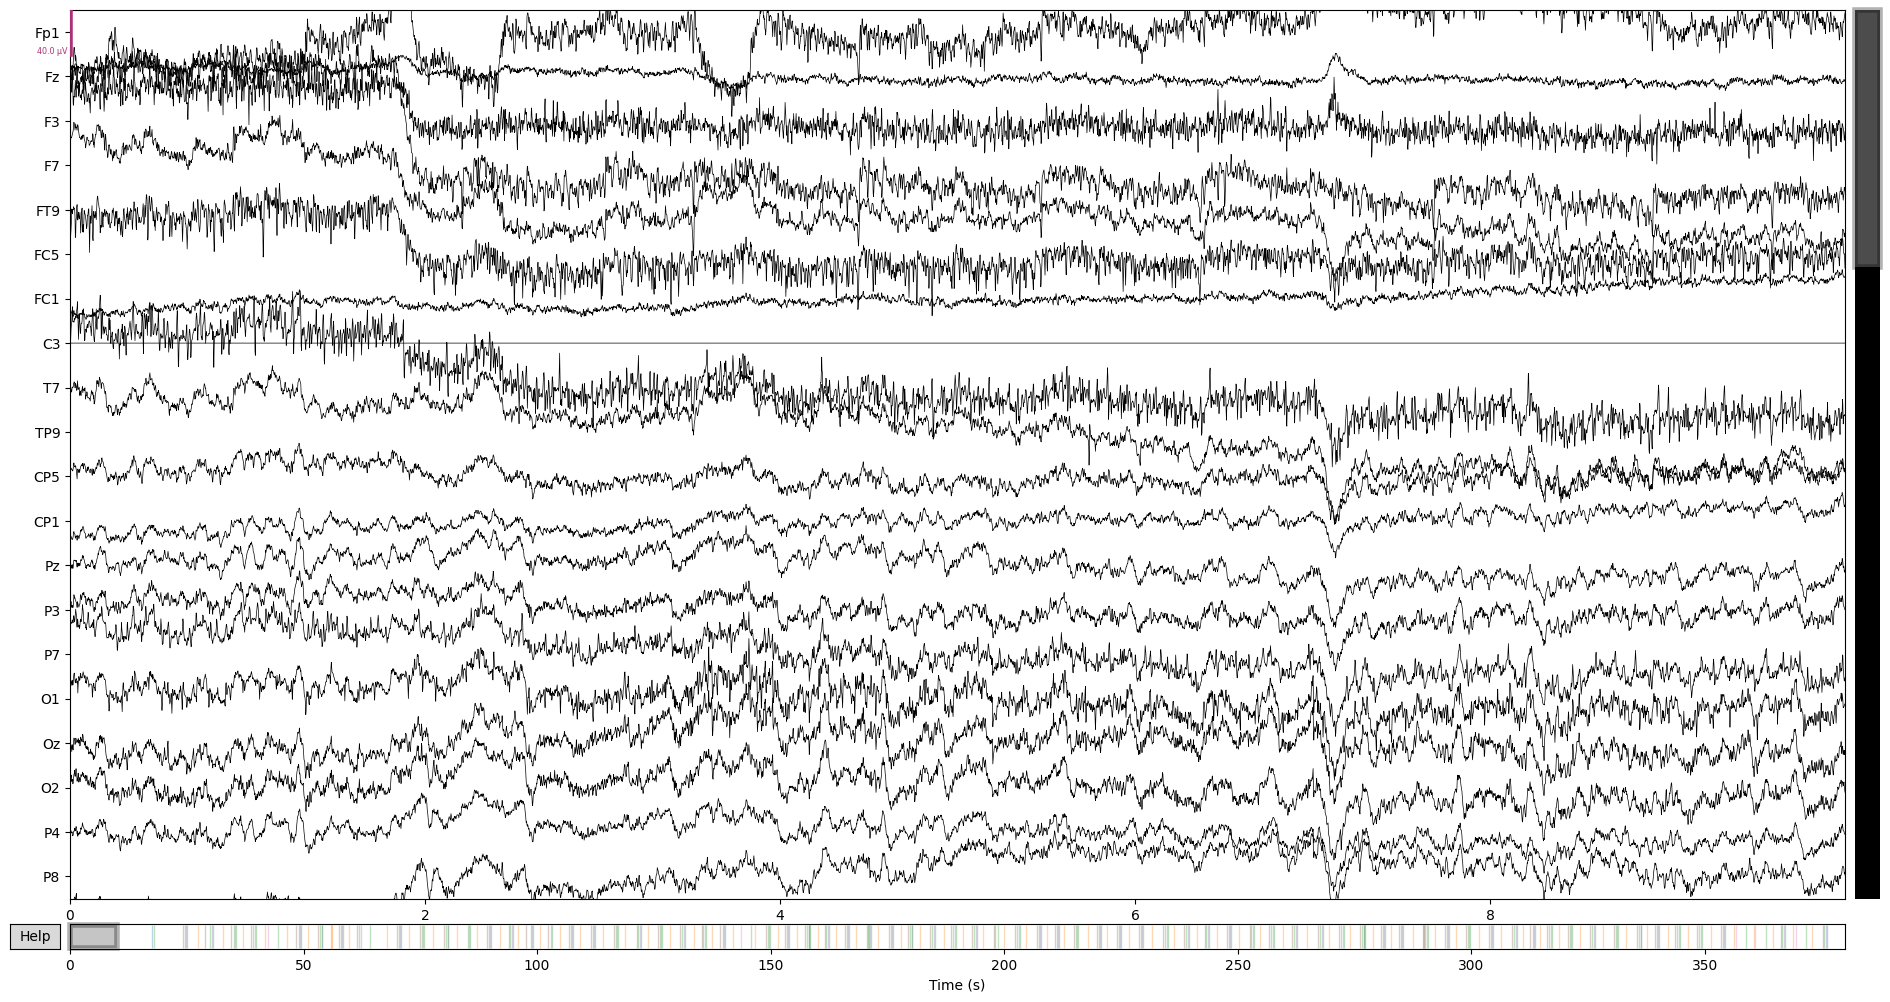

In [109]:
raw.plot()

In [102]:
for i, event in enumerate(events[0]):
    if i > 0:
        # if (events[0][i][0] - events[0][i-1][0])/500 > 0.23:
            print(f'{i} Event {event[2]}: {event[0]/500}: {(events[0][i][0] - events[0][i-1][0])/500} s')

1 Event 8: 18.026: 0.502 s
2 Event 12: 24.172: 6.146 s
3 Event 8: 24.54: 0.368 s
4 Event 9: 24.86: 0.32 s
5 Event 8: 25.062: 0.202 s
6 Event 4: 27.456: 2.394 s
7 Event 12: 28.988: 1.532 s
8 Event 8: 30.038: 1.05 s
9 Event 9: 30.356: 0.318 s
10 Event 8: 30.558: 0.202 s
11 Event 4: 32.722: 2.164 s
12 Event 12: 34.54: 1.818 s
13 Event 8: 35.038: 0.498 s
14 Event 9: 35.356: 0.318 s
15 Event 8: 35.56: 0.204 s
16 Event 4: 37.14: 1.58 s
17 Event 12: 38.824: 1.684 s
18 Event 8: 39.238: 0.414 s
19 Event 9: 39.556: 0.318 s
20 Event 8: 39.76: 0.204 s
21 Event 4: 41.822: 2.062 s
22 Event 13: 42.418: 0.596 s
23 Event 8: 44.618: 2.2 s
24 Event 4: 46.506: 1.888 s
25 Event 12: 48.488: 1.982 s
26 Event 8: 48.924: 0.436 s
27 Event 9: 49.242: 0.318 s
28 Event 8: 49.444: 0.202 s
29 Event 4: 50.904: 1.46 s
30 Event 12: 53.104: 2.2 s
31 Event 8: 53.538: 0.434 s
32 Event 9: 53.858: 0.32 s
33 Event 8: 54.058: 0.2 s
34 Event 4: 55.988: 1.93 s
35 Event 12: 57.52: 1.532 s
36 Event 8: 57.92: 0.4 s
37 Event 9: 58.

In [103]:
last_col = events[0][:, -1]

unique_vals, counts = np.unique(last_col, return_counts=True)

# Put into a convenient structure
unique_counts = dict(zip(unique_vals, counts))
unique_counts

{np.int64(1): np.int64(2),
 np.int64(4): np.int64(76),
 np.int64(8): np.int64(148),
 np.int64(9): np.int64(71),
 np.int64(12): np.int64(71),
 np.int64(13): np.int64(5)}

In [16]:
ann = raw.annotations

counts = pd.Series(ann.description).value_counts()
print(counts)

Stimulus/S  8    57
Stimulus/S 20    57
Stimulus/S 30    57
Stimulus/S 50    56
Stimulus/S 40    56
Stimulus/S  9    56
Stimulus/S  1     1
Stimulus/S 77     1
Stimulus/S  2     1
Stimulus/S  3     1
Stimulus/S  4     1
Stimulus/S  5     1
Stimulus/S  6     1
Stimulus/S  7     1
Name: count, dtype: int64


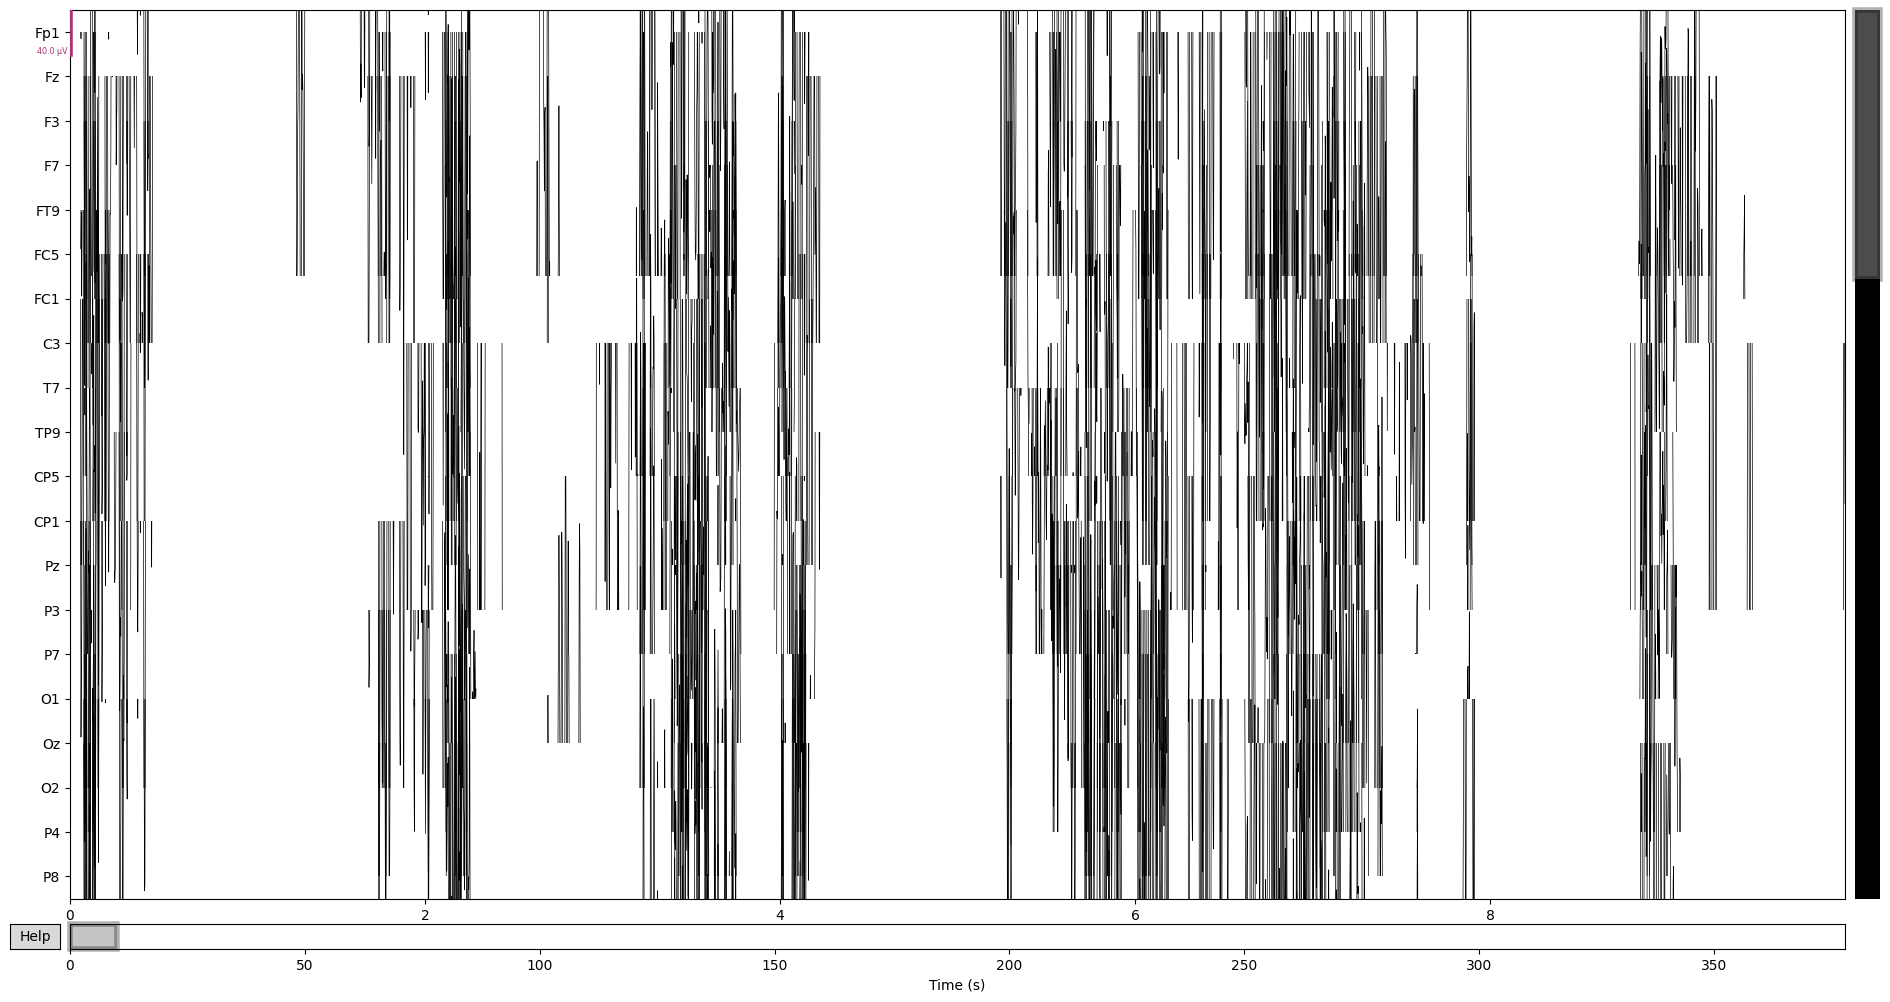

In [17]:
raw.set_annotations(None)
raw.plot(events=events[0])

**RS**

In [5]:
eeg_path = "C:\\Users\\a1902989\\Box\\Katya\\# PD project\\pilot\\eeg"
eeg_file_name = "test_empty_srcheck2.vhdr"
raw = mne.io.read_raw_brainvision(os.path.join(eeg_path, eeg_file_name), preload=True)
raw.info

Extracting parameters from C:\Users\a1902989\Box\Katya\# PD project\pilot\eeg\test_empty_srcheck2.vhdr...
Setting channel info structure...
Reading 0 ... 12869  =      0.000 ...    25.738 secs...


C:\Users\a1902989\AppData\Local\Temp\ipykernel_25348\359091623.py:3: RuntimeWarning: No coordinate information found for channels ['Photodiode', 'EMG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(os.path.join(eeg_path, eeg_file_name), preload=True)
C:\Users\a1902989\AppData\Local\Temp\ipykernel_25348\359091623.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photodiode', 'EMG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(os.path.join(eeg_path, eeg_file_name), preload=True)


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 64 EEG, 2 misc
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 131.0 Hz
 meas_date: 2026-01-12 10:36:18 UTC
 nchan: 66
 projs: []
 sfreq: 500.0 Hz
>

In [24]:
events = mne.events_from_annotations(raw)
events

Used Annotations descriptions: [np.str_('Stimulus/S 50'), np.str_('Stimulus/S 51'), np.str_('Stimulus/S 52'), np.str_('Stimulus/S 53'), np.str_('Stimulus/S100'), np.str_('Stimulus/S101')]


(array([[ 6342,     0,   100],
        [ 7028,     0,   101],
        [ 8134,     0,    50],
        [13136,     0,    51],
        [13663,     0,    52],
        [18665,     0,    53]]),
 {np.str_('Stimulus/S 50'): 50,
  np.str_('Stimulus/S 51'): 51,
  np.str_('Stimulus/S 52'): 52,
  np.str_('Stimulus/S 53'): 53,
  np.str_('Stimulus/S100'): 100,
  np.str_('Stimulus/S101'): 101})

In [26]:
ann = raw.annotations

counts = pd.Series(ann.description).value_counts()
print(counts)

Stimulus/S100    1
Stimulus/S101    1
Stimulus/S 50    1
Stimulus/S 51    1
Stimulus/S 52    1
Stimulus/S 53    1
Name: count, dtype: int64


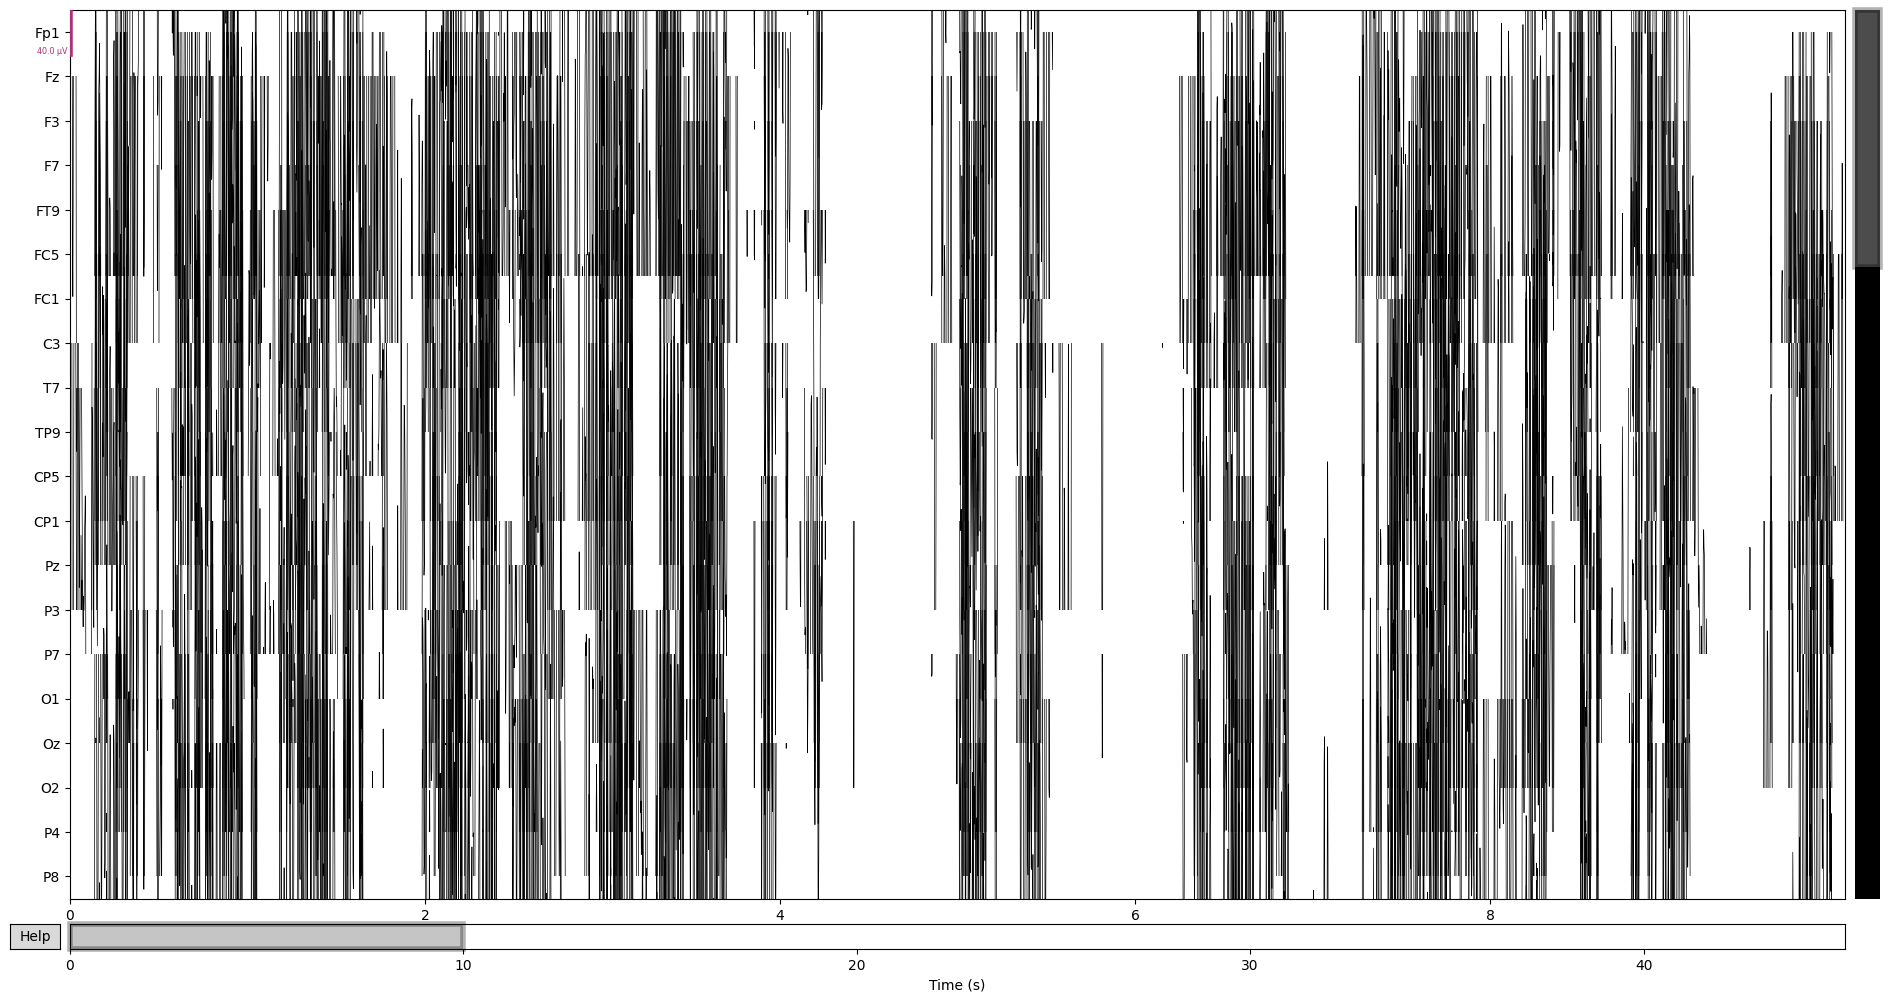

In [27]:
raw.set_annotations(None)
raw.plot(events=events[0])

In [32]:
(18665 - 13663) / 500

10.004

**FTT**

In [47]:
eeg_path = "C:\\Users\\a1902989\\Box\\Katya\\# PD project\\pilot\\eeg"
eeg_file_name = "tast_nosub_06_FTTc.vhdr"
raw = mne.io.read_raw_brainvision(os.path.join(eeg_path, eeg_file_name), preload=True)
raw.info

Extracting parameters from C:\Users\a1902989\Box\Katya\# PD project\pilot\eeg\tast_nosub_06_FTTc.vhdr...
Setting channel info structure...
Reading 0 ... 52669  =      0.000 ...   105.338 secs...


C:\Users\a1902989\AppData\Local\Temp\ipykernel_12296\684336996.py:3: RuntimeWarning: No coordinate information found for channels ['Photodiode', 'Acc X', 'Acc Y', 'Acc Z', 'EMG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(os.path.join(eeg_path, eeg_file_name), preload=True)
C:\Users\a1902989\AppData\Local\Temp\ipykernel_12296\684336996.py:3: RuntimeWarning: Not setting positions of 5 misc channels found in montage:
['Photodiode', 'Acc X', 'Acc Y', 'Acc Z', 'EMG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(os.path.join(eeg_path, eeg_file_name), preload=True)


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 64 EEG, 5 misc
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 131.0 Hz
 meas_date: 2026-01-09 15:28:48 UTC
 nchan: 69
 projs: []
 sfreq: 500.0 Hz
>

In [48]:
events = mne.events_from_annotations(raw)
events

Used Annotations descriptions: [np.str_('Stimulus/S 10'), np.str_('Stimulus/S 11'), np.str_('Stimulus/S 12'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 15'), np.str_('Stimulus/S100'), np.str_('Stimulus/S101'), np.str_('Stimulus/S102'), np.str_('Stimulus/S103')]


(array([[ 7072,     0,   100],
        [ 7296,     0,   101],
        [ 7794,     0,    10],
        [ 7798,     0,    11],
        [ 8362,     0,    12],
        [ 8413,     0,    13],
        [ 8767,     0,    15],
        [ 9218,     0,    14],
        [ 9469,     0,    10],
        [ 9473,     0,    11],
        [ 9912,     0,    12],
        [ 9963,     0,    13],
        [10028,     0,    15],
        [10479,     0,    14],
        [10730,     0,    10],
        [10736,     0,    11],
        [11238,     0,    12],
        [11287,     0,    13],
        [11348,     0,    15],
        [11800,     0,    14],
        [12051,     0,    10],
        [12055,     0,    11],
        [12605,     0,    12],
        [12658,     0,    13],
        [12722,     0,    15],
        [13173,     0,    14],
        [13424,     0,    10],
        [13430,     0,    11],
        [14027,     0,    12],
        [14078,     0,    13],
        [14139,     0,    15],
        [14590,     0,    14],
        

In [49]:
ann = raw.annotations

counts = pd.Series(ann.description).value_counts()
print(counts)

Stimulus/S 11    30
Stimulus/S 10    30
Stimulus/S 14    30
Stimulus/S 13    30
Stimulus/S 12    30
Stimulus/S 15    29
Stimulus/S101     1
Stimulus/S100     1
Stimulus/S102     1
Stimulus/S103     1
Name: count, dtype: int64


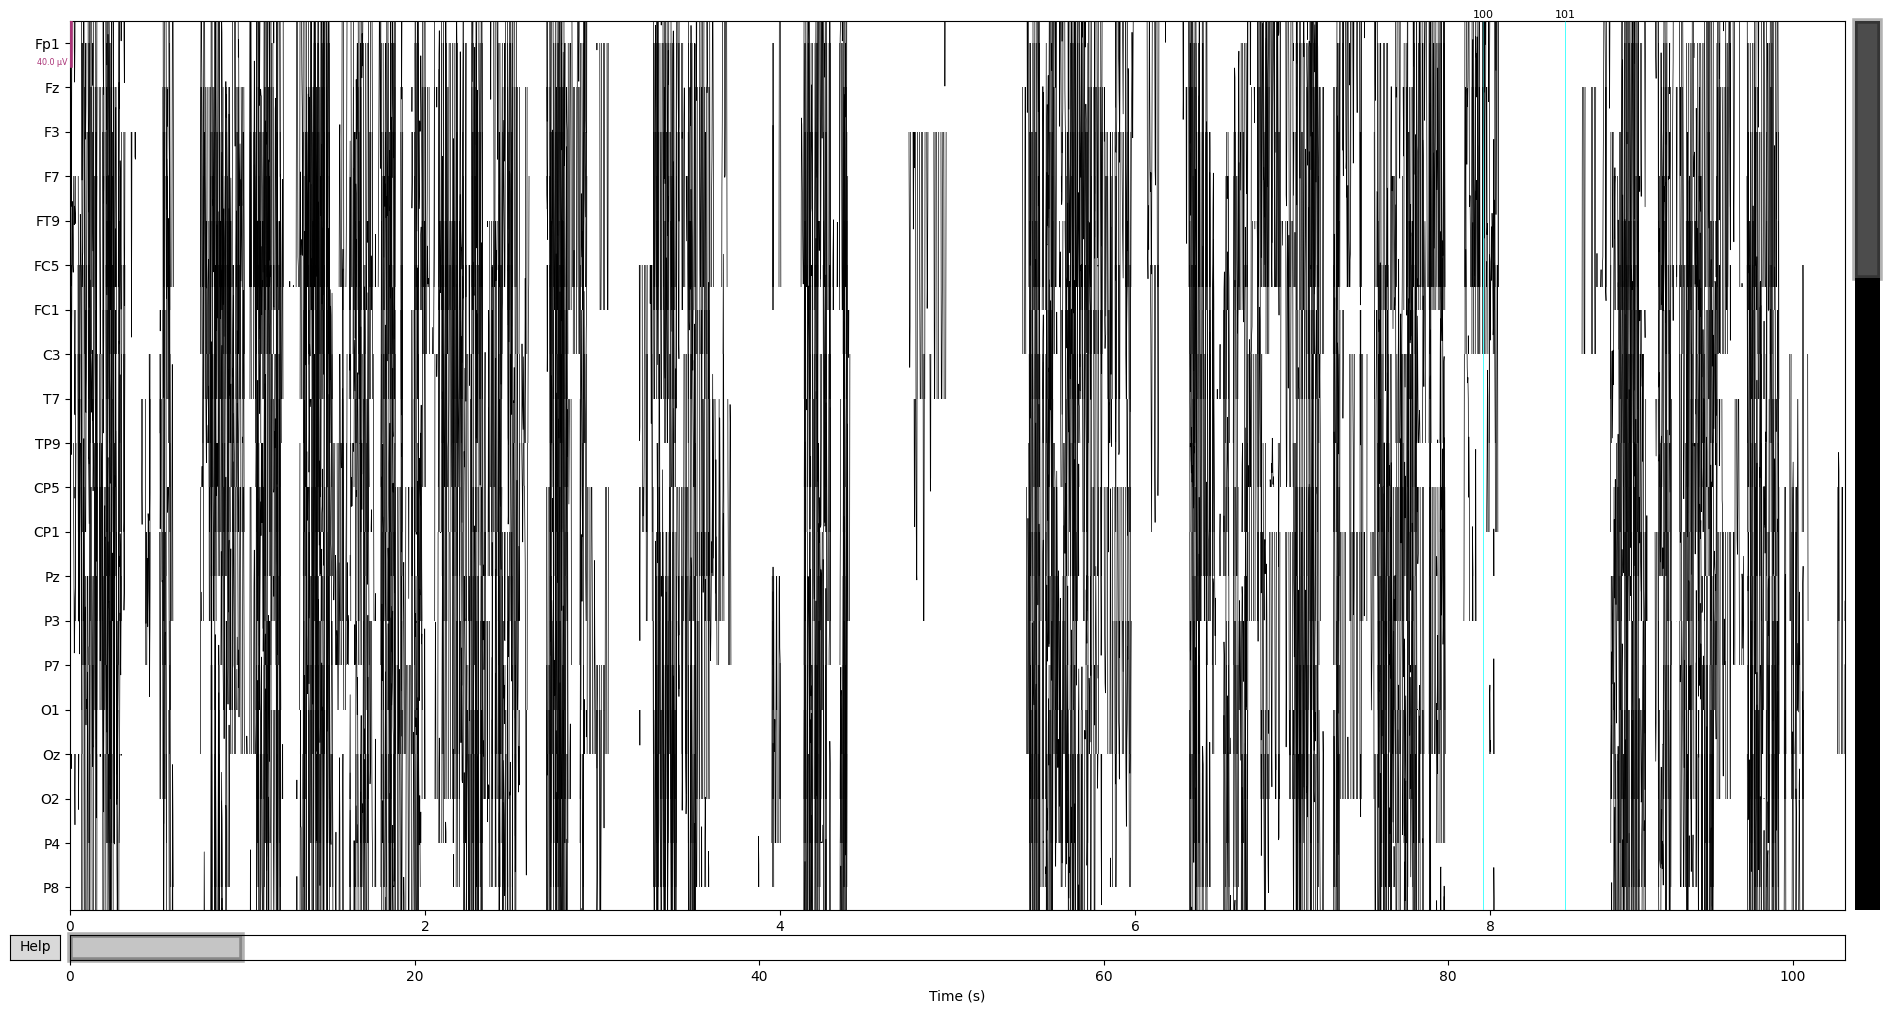

In [36]:
raw.set_annotations(None)
raw.plot(events=events[0])

In [ ]:
(18665 - 13663) / 500

10.004